In [ ]:
from google.colab import files
uploded= files.upload()

import pandas as pd

CO_Q= pd.read_excel('CO_Questions Mapping.xlsx').fillna(0)
Amat=CO_Q.drop(['COs'], axis=1)

Marks_obtained= pd.read_excel('Marks_obtained.xlsx').fillna(0)
Bmat=Marks_obtained.drop(['Student No'],axis=1).fillna(0)

Row_sum=Amat.sum(axis = 1, skipna = True)
Colm_sum=Amat.sum(axis=0,skipna=True)

Amat= Amat.div(Row_sum.values,axis=0)
Amat=(Amat [0:]/Colm_sum )
Amat=Amat*100

CO_result=pd.DataFrame([Marks_obtained.iloc[:, 0]]).transpose()
i = 1
while i <= len(Amat.index):
  CO_result["CO"+str(i)]=(Bmat [0:]*Amat.iloc[i-1]).sum(axis=1).round()
  i += 1

CO_PO= pd.read_excel('CO_PO Mapping.xlsx').fillna(0)
Cmat=CO_PO.drop(['POs'], axis=1)
Dmat=CO_result.drop(['Student No'],axis=1).fillna(0)

Col_sum=Cmat.sum(axis=0,skipna=True)
Cmat=(Cmat [0:]/Col_sum )
Ro_sum=Cmat.sum(axis = 1, skipna = True)
Cmat= Cmat.div(Ro_sum.values,axis=0)

PO_result=pd.DataFrame([CO_result.iloc[:, 0]]).transpose()
i = 1
while i <= len(Cmat.index):
  PO_result["PO"+str(i)]=(Dmat [0:]*Cmat.iloc[i-1]).sum(axis=1)
  i += 1

Course = "" #@param {type:"string"}
reportname = 'Report '+ Course +'.xlsx'
with pd.ExcelWriter(reportname ) as writer:  
    CO_result.to_excel(writer, sheet_name='CO report')
    PO_result.to_excel(writer, sheet_name='PO report')

files.download(reportname )

PO_Data_Base=pd.read_excel('PO Data Base.xlsx').fillna(0)
 
i=1
while i <= len(PO_result):
    j=1
    while j <= len(PO_Data_Base):
        if PO_result.iloc[i-1,PO_result.columns.get_loc("Student No")] == PO_Data_Base.iloc[j-1, PO_Data_Base.columns.get_loc("Student No")] :
                PO_Data_Base.iloc[j-1, 1:] = PO_Data_Base.iloc[j-1, 1:] + PO_result.iloc[i-1, 1:]
        j += 1
        
    i += 1
 

with pd.ExcelWriter('PO Data Base.xlsx') as writer:  
   PO_Data_Base.to_excel(writer, sheet_name='PO Data Base',index=False)
 
files.download('PO Data Base.xlsx')

date= '2020-10-13' #@param {type:"date"}
basename = 'PO Data Base '+ date +'.xlsx'

with pd.ExcelWriter(basename) as writer:  
    PO_Data_Base.to_excel(writer, sheet_name='PO_Data_Base',index=False)

files.download(basename)





Saving CO_PO Mapping.xlsx to CO_PO Mapping.xlsx
Saving CO_Questions Mapping.xlsx to CO_Questions Mapping.xlsx
Saving Marks_obtained.xlsx to Marks_obtained.xlsx
Saving PO Data Base.xlsx to PO Data Base.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

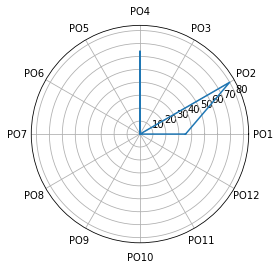

In [ ]:
import matplotlib.pyplot as plt
from math import pi

categories = ['PO1', 'PO2','PO3','PO4','PO5', 'PO6','PO7','PO8','PO9','PO10','PO11','PO12']
values= PO_Data_Base.iloc[2, 1:].values.tolist() # value for each category
N = len(values) # number of categories
# repeat first value to close the circle
values += values[:1]

# calculate angle for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
# repeat first value to close the circle
angles += angles[:1]

# plot
plt.polar(angles,values)
plt.xticks (angles[:-1], categories)
plt.show()